### Project Background 
Term deposits serve as a significant revenue stream for banks, representing cash investments held within financial institutions. These investments involve committing funds for a predetermined period, during which they accrue interest at an agreed-upon rate. To promote term deposits, banks employ various outreach strategies including email marketing, advertisements, telephonic marketing, and digital marketing.

Nowadays, marketing spending in the banking industry is massive, meaning that it is essential for banks to optimize marketing strategies and improve effectiveness. Understanding customers’ need leads to more effective marketing plans, smarter product designs and greater customer satisfaction.

### Main Objective 
Enable the bank to develop a more granular understanding of its customer base, predict customers' response to its telemarketing campaign and establish a target customer profile for future marketing plans. 

Doing this , the bank will be able to predict customer saving behaviours and identify which type of customers is more likely to make term deposits. The bank can then focus its marketing efforts on those customers. This will not only allow the bank to secure deposits more effectively but also increase customer satisfaction by reducing undesirable advertisements for certain customers.

In [20]:
dataframe = pd.read_csv("banking_data.csv")
print(dataframe.shape)
display(dataframe.head())
display(dataframe.info())

(45216, 19)


,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,married,tertiary,no,2143,yes,no,unknown,5,may,5-May,261,1,-1,0,unknown,no
1,44,technician,single,single,secondary,no,29,yes,no,unknown,5,may,5-May,151,1,-1,0,unknown,no
2,33,entrepreneur,married,married,secondary,no,2,yes,yes,unknown,5,may,5-May,76,1,-1,0,unknown,no
3,47,blue-collar,married,married,unknown,no,1506,yes,no,unknown,5,may,5-May,92,1,-1,0,unknown,no
4,33,unknown,single,single,unknown,no,1,no,no,unknown,5,may,5-May,198,1,-1,0,unknown,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45216 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45216 non-null  int64 
 1   job             45216 non-null  object
 2   marital         45213 non-null  object
 3   marital_status  45213 non-null  object
 4   education       45213 non-null  object
 5   default         45216 non-null  object
 6   balance         45216 non-null  int64 
 7   housing         45216 non-null  object
 8   loan            45216 non-null  object
 9   contact         45216 non-null  object
 10  day             45216 non-null  int64 
 11  month           45216 non-null  object
 12  day_month       45216 non-null  object
 13  duration        45216 non-null  int64 
 14  campaign        45216 non-null  int64 
 15  pdays           45216 non-null  int64 
 16  previous        45216 non-null  int64 
 17  poutcome        45216 non-null  object
 18  y     

None

There are 45216 observations in the dataset , each representing an existing customer that the bank reached via phone calls . Each observation has 19 features , with the last feature revealing whether they have subscribed to the term deposit or not .

#### Cleaning the dataset

In [21]:
# Cleaning the dataset 

# dataframe.isna().sum()
dataframe.dropna(inplace=True)

In [22]:
# dataframe['poutcome'].unique()
dataframe[dataframe['poutcome'] == 'other'] # dropping these rows 
dataframe = dataframe[dataframe['poutcome'] != 'other']
print(dataframe.shape)

(43372, 19)


In [23]:
# dataframe['education'].unique()
dataframe[dataframe['education'] == 'unknown'] # dropping these rows 
dataframe = dataframe[dataframe['education'] != 'unknown']
print(dataframe.shape)

(41580, 19)


In [28]:
# Dropping outliers in the 'balance' column 

dataframe['balance'].describe()

count     41580.000000
mean       1349.630135
std        3024.002802
min       -8019.000000
25%          69.000000
50%         437.500000
75%        1410.000000
max      102127.000000
Name: balance, dtype: float64

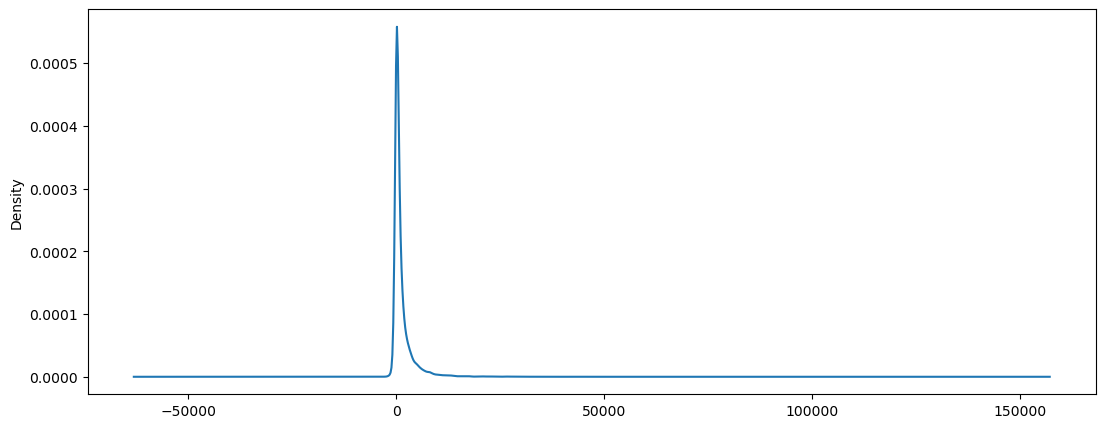

In [29]:
plt.figure(figsize=[13,5])
dataframe['balance'].plot(kind='kde'); 

In [36]:
dataframe['balance_outliers'] = dataframe['balance']
dataframe['balance_outliers'] = zscore(dataframe['balance_outliers'])
condition = (dataframe['balance_outliers'] > 3) | (dataframe['balance_outliers'] < -3)
dataframe = dataframe.drop(dataframe[condition].index, axis=0)
dataframe.drop(columns=['balance_outliers'], axis=1, inplace=True)
print(dataframe.shape)

(40894, 19)


In [40]:
# Transforming the data 

dataframe['y'] = dataframe['y'].apply(lambda x : 0 if x=='no' else 1)
dataframe.head()

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,married,tertiary,no,2143,yes,no,unknown,5,may,5-May,261,1,-1,0,unknown,0
1,44,technician,single,single,secondary,no,29,yes,no,unknown,5,may,5-May,151,1,-1,0,unknown,0
2,33,entrepreneur,married,married,secondary,no,2,yes,yes,unknown,5,may,5-May,76,1,-1,0,unknown,0
5,35,management,married,married,tertiary,no,231,yes,no,unknown,5,may,5-May,139,1,-1,0,unknown,0
6,28,management,single,single,tertiary,no,447,yes,yes,unknown,5,may,5-May,217,1,-1,0,unknown,0


In [42]:
dataframe['contact'].value_counts() # Dropping contacts 

contact
cellular     26254
unknown      12153
telephone     2487
Name: count, dtype: int64

In [43]:
dataframe.drop(columns=['contact'], axis=1, inplace=True)

In [44]:
# Changing unit of duration from seconds to minutes 
dataframe['duration'] = dataframe['duration'].apply(lambda n:n/60).round(2)
dataframe.head()

,age,job,marital,marital_status,education,default,balance,housing,loan,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,married,tertiary,no,2143,yes,no,5,may,5-May,4.35,1,-1,0,unknown,0
1,44,technician,single,single,secondary,no,29,yes,no,5,may,5-May,2.52,1,-1,0,unknown,0
2,33,entrepreneur,married,married,secondary,no,2,yes,yes,5,may,5-May,1.27,1,-1,0,unknown,0
5,35,management,married,married,tertiary,no,231,yes,no,5,may,5-May,2.32,1,-1,0,unknown,0
6,28,management,single,single,tertiary,no,447,yes,yes,5,may,5-May,3.62,1,-1,0,unknown,0


In [45]:
# Changing month from name to numbers 
lst = [dataframe]
for column in lst:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12

In [47]:
dataframe.drop('month', axis=1, inplace=True)

In [48]:
dataframe.head()

,age,job,marital,marital_status,education,default,balance,housing,loan,day,day_month,duration,campaign,pdays,previous,poutcome,y,month_int
0,58,management,married,married,tertiary,no,2143,yes,no,5,5-May,4.35,1,-1,0,unknown,0,5.0
1,44,technician,single,single,secondary,no,29,yes,no,5,5-May,2.52,1,-1,0,unknown,0,5.0
2,33,entrepreneur,married,married,secondary,no,2,yes,yes,5,5-May,1.27,1,-1,0,unknown,0,5.0
5,35,management,married,married,tertiary,no,231,yes,no,5,5-May,2.32,1,-1,0,unknown,0,5.0
6,28,management,single,single,tertiary,no,447,yes,yes,5,5-May,3.62,1,-1,0,unknown,0,5.0


In [51]:
# Drop rows with duration less than 5 seconds
dataframe = dataframe.drop(dataframe[dataframe['duration']<5/60].index, axis=0)
dataframe = dataframe.drop(dataframe[dataframe['education']=='other'].index, axis=0) # drop education value others 

print(dataframe.shape)

(40838, 18)


### Exploratory Data Analysis

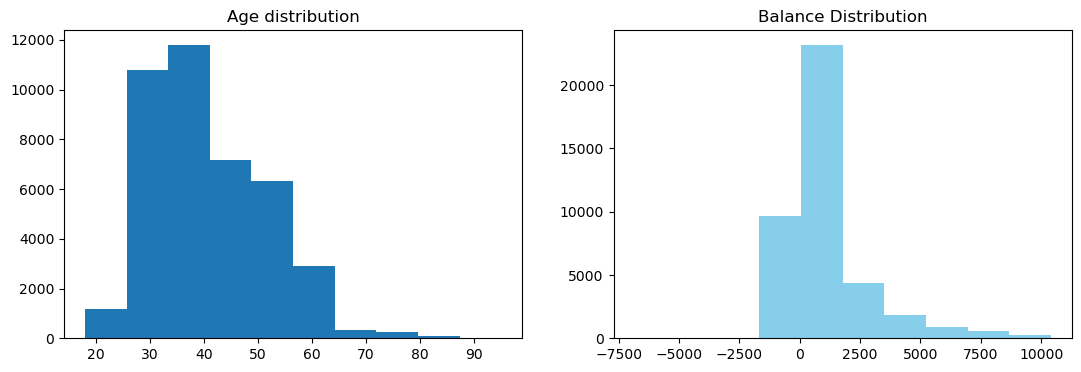

In [55]:
# Distribution between 'age' and 'balance'
plt.figure(figsize=[13, 4])
plt.subplot(1,2,1)
plt.hist(dataframe['age'])
plt.title("Age distribution")
plt.subplot(1,2,2)
plt.hist(dataframe['balance'], color='skyblue')
plt.title("Balance Distribution")
plt.show(); 

The distribution of age: In its telemarketing campaigns, clients called by the bank have an extensive age range, from 18 to 95 years old. However, a majority of customers called is in the age of 30s and 40s (33 to 48 years old fall within the 25th to 75th percentiles). The distribution of customer age is fairly normal with a small standard deviation.

The distribution of balance: After dropping outliers in balance, the range of balance is still massive, from a minimum of -6847 to a maximum of 10443 euros, giving a range of 17290 euros. The distribution of balance has a huge standard deviation relative to the mean, suggesting large variabilities in customers' balance levels.

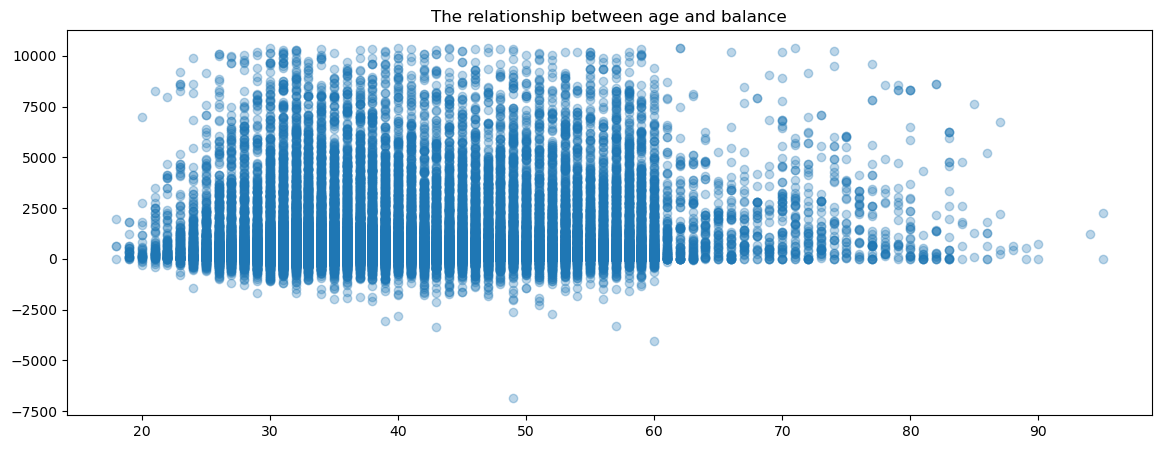

In [61]:
# Visualising the relationship between 'age' and 'balance'

plt.figure(figsize=[14,5])
plt.scatter(data=dataframe, x='age', y='balance', alpha=0.3)
plt.title("The relationship between age and balance")
plt.show()

Based on this scatter plot, there is no clear relationship between client’s age and balance level.

Nevertheless, over the age of 60, clients tend to have a significantly lower balance, mostly under 5,000 euros. This is due to the fact that most people retire after 60 and no longer have a reliable income source.

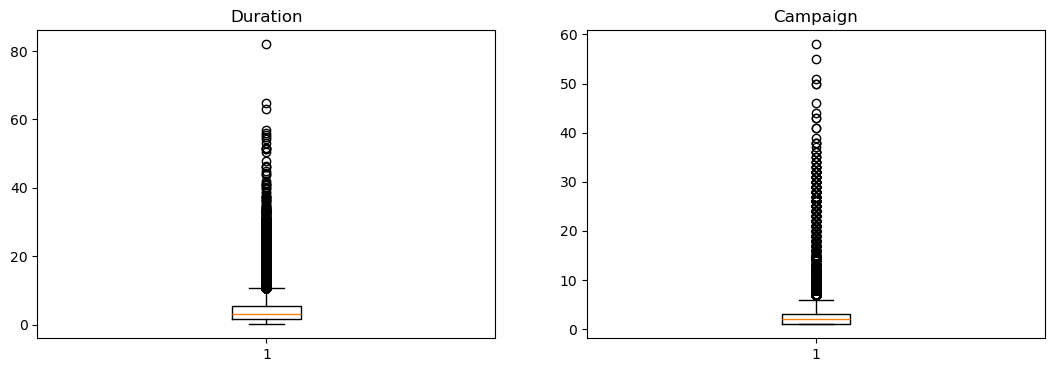

In [67]:
# Distribution of 'duration' and 'campaign'
plt.figure(figsize=[13, 4])
plt.subplot(1,2,1)
plt.boxplot(dataframe['duration'])
plt.title("Duration")
plt.subplot(1,2,2)
plt.boxplot(dataframe['campaign'])
plt.title("Campaign")
plt.show(); 

In [69]:
print(dataframe['duration'].describe())
print(dataframe['campaign'].describe())

count    40838.000000
mean         4.309035
std          4.305882
min          0.100000
25%          1.730000
50%          3.000000
75%          5.300000
max         81.970000
Name: duration, dtype: float64
count    40838.000000
mean         2.774083
std          3.104287
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         58.000000
Name: campaign, dtype: float64


The distribution of duration: As observed from the box plot, the duration of contact has a median of 3 minutes, with an interquartile range of 1.73 minutes to 5.3 minutes. The left-skewed boxplot indicates that most calls are relatively short. Also, there is a large number of outliers ranging from 10 minutes to 40 minutes, which are worth further study.

The distribution of campagin: About half of the clients have been contacted by the bank for the second time, while 25% was first introduced to the term deposit. Most clients have been reached by the bank for one to three times, which is reasonable. However, some clients have been contacted by as high as 58 times, which is not normal. These clients may have some special needs that require frequent contact.

<Axes: xlabel='duration', ylabel='campaign'>

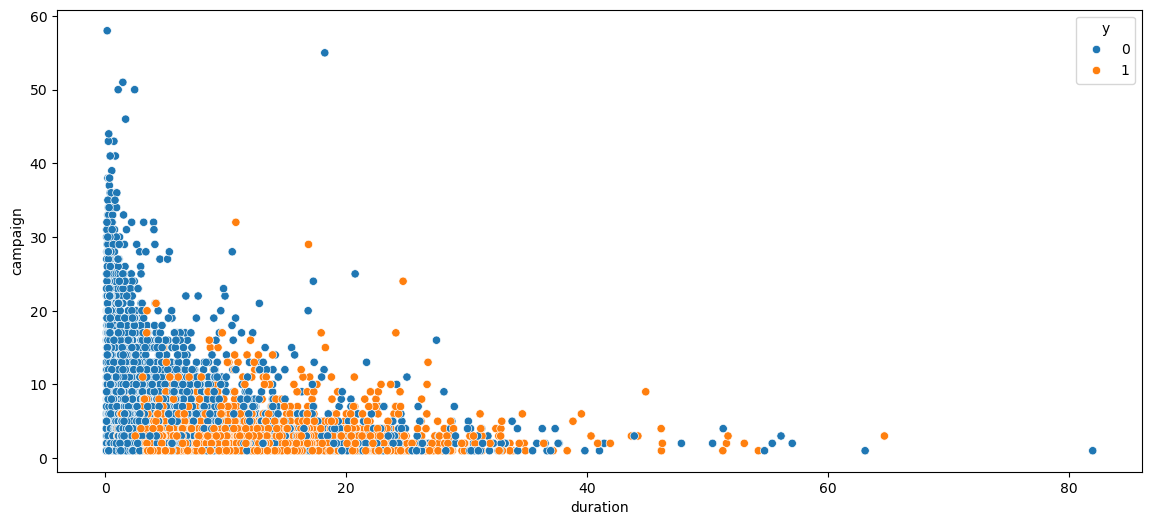

In [77]:
# Visualising 'duration' and 'campaign' w.r.t 'y' result 
plt.figure(figsize=[14,6])
sns.scatterplot(data=dataframe, x='duration',y='campaign', hue='y')

In this scatter plot, clients subscribed to term deposits are denoted as "yes" while those did not are denoted as "no".

As we can see from the plot, “yes” clients and “no” clients are forming two relatively separate clusters. Compared to “no” clients”, “yes” clients were contacted by fewer times and had longer call duration. More importantly, after five campaign calls, clients are more likely to reject the term deposit unless the duration is high. Most “yes” clients were approached by less than 10 times.

This suggests that the bank should resist calling a client for more than five times, which can be disturbing and increase dissatisfaction.

<Axes: >

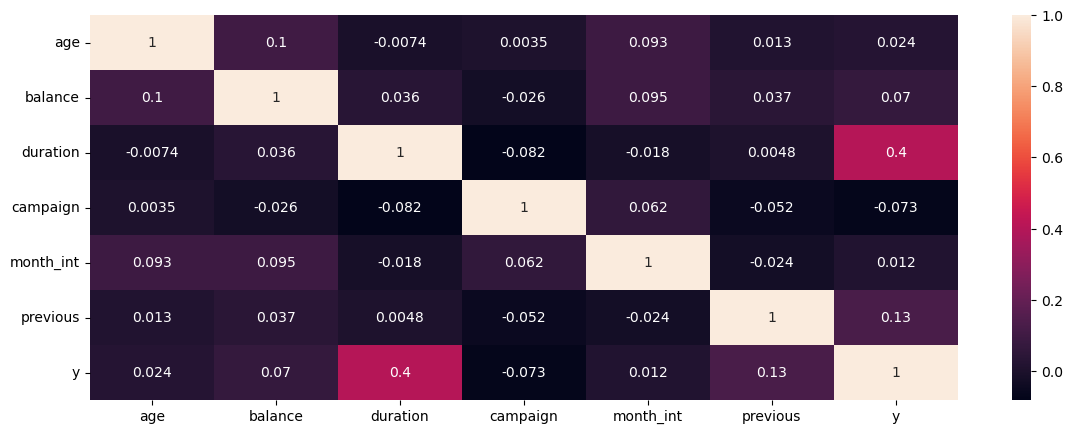

In [81]:
# Correlation 
corr_df = dataframe[['age','balance','duration','campaign','month_int','previous','y']]
plt.figure(figsize=[14,5])
sns.heatmap(corr_df.corr(), annot=True)

To investigate more about correlation, a correlation matrix was plotted with all qualitative variables. Clearly, “campaign outcome” has a strong correlation with “duration”, a moderate correlation with “previous contacts”, and mild correlations between “balance”, “month of contact” and “number of campaign”. Their influences on campaign outcome will be investigated further in the machine learning part.

<b>With a sound knowledge of the distribution of key variables, further analysis of each customer characteristic can be carried out to investigate its influence on the subscription rate.</b>

Visualising the subscription and contract rate by age

In [82]:
lst = [dataframe]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

In [84]:
dataframe.head()

,age,job,marital,marital_status,education,default,balance,housing,loan,day,day_month,duration,campaign,pdays,previous,poutcome,y,month_int,age_group
0,58,management,married,married,tertiary,no,2143,yes,no,5,5-May,4.35,1,-1,0,unknown,0,5.0,50.0
1,44,technician,single,single,secondary,no,29,yes,no,5,5-May,2.52,1,-1,0,unknown,0,5.0,40.0
2,33,entrepreneur,married,married,secondary,no,2,yes,yes,5,5-May,1.27,1,-1,0,unknown,0,5.0,30.0
5,35,management,married,married,tertiary,no,231,yes,no,5,5-May,2.32,1,-1,0,unknown,0,5.0,30.0
6,28,management,single,single,tertiary,no,447,yes,yes,5,5-May,3.62,1,-1,0,unknown,0,5.0,20.0


In [153]:
count_age_response_act = pd.crosstab(dataframe['y'], dataframe['age_group']).apply(lambda x : x/x.sum()*100)
count_age_response_act = count_age_response_act.transpose()
count_age_response_act.rename({1:'Yes', 0:'No'}, inplace=True)

In [154]:
# count_age_response_pct.T['Yes']
count_age_response_act

y,0,1
age_group,,
20.0,82.992624,17.007376
30.0,89.639558,10.360442
40.0,91.174235,8.825765
50.0,90.803833,9.196167
60.0,66.442953,33.557047


In [157]:
age = pd.DataFrame(dataframe['age_group'].value_counts())
age.rename(columns={'count':'age_group'}, inplace=True)
age['% Contacted'] = age['age_group']*100 / age['age_group'].sum()
age['% Subscription'] = count_age_response_act[1]
age.drop('age_group', axis=1, inplace=True)

In [161]:
age['age'] = [30,40,50,20,60]
age = age.sort_values('age', ascending=True)
age

,% Contacted,% Subscription,age
age_group,,,
50.0,18.399530,9.196167,20
20.0,11.619080,17.007376,30
30.0,40.557814,10.360442,40
40.0,25.775013,8.825765,50
60.0,3.648563,33.557047,60


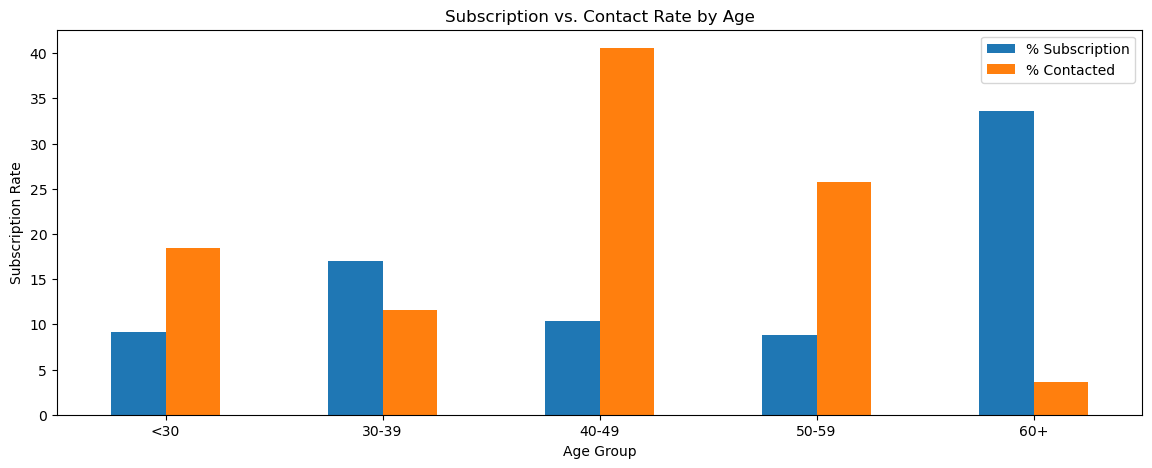

In [164]:
plot_age = age[['% Subscription','% Contacted']].plot(kind = 'bar',figsize=(14,5),)
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')
plt.show()

#### Inference : 
<b> Target the youngest and the oldest instead of the middle-aged </b>

Blue vertical bars indicate that clients with a age of 60+ have the highest subscription rate. About 17% of the subscriptions came from the clients aged between 18 to 29. More than 50% of the subscriptions are contributed by the youngest and the eldest clients.

It is not surprising to see such a pattern because the main investment objective of older people is saving for retirement while the middle-aged group tend to be more aggressive with a main objective of generating high investment income. Term deposits, as the least risky investment tool, are more preferable to the eldest.
The youngest may not have enough money or professional knowledge to engage in sophisticated investments, such as stocks and mutual funds. Term deposits provide liquidity and generate interest incomes that are higher than the regular saving account, so term deposits are ideal investments for students.

However, yellow vertical bars show that the bank focused its marketing efforts on the middle-aged group, which returned lower subscription rates than the younger and older groups. 

Thus, to make the marketing campaign more effective, the bank should target younger and older clients in the future.

Visualising the subscription rate by balance level 

In [165]:
lst = [dataframe]
for column in lst:
    column.loc[column["balance"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["balance"] > 0) & (column["balance"] <= 1000), 'balance_group'] = 'low balance'
    column.loc[(column["balance"] > 1000) & (column["balance"] <= 5000), 'balance_group'] = 'average balance'
    column.loc[(column["balance"] > 5000), 'balance_group'] = 'high balance'

,% Contacted,% Subscription,bal
balance_group,,,
no balance,16.592389,6.921488,0
low balance,52.397277,10.739321,1
average balance,26.325971,14.789322,2
high balance,4.684363,14.950340,3


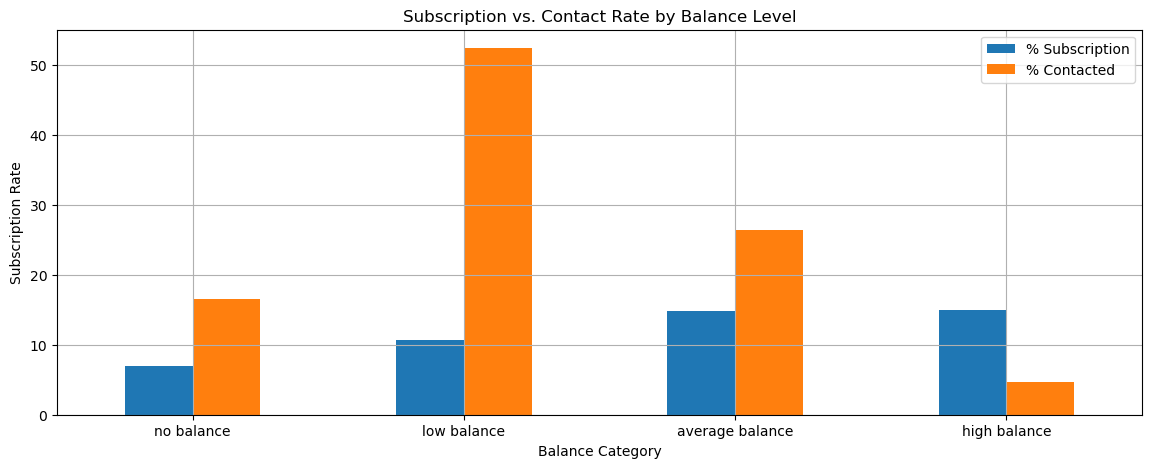

In [392]:
count_age_response_act = pd.crosstab(dataframe['y'], dataframe['balance_group']).apply(lambda x : x/x.sum()*100)
count_age_response_act = count_age_response_act.transpose()
# count_age_response_act.rename({1:'Yes', 0:'No'}, inplace=True)
# count_age_response_pct.T['Yes']
count_age_response_act
bal = pd.DataFrame(dataframe['balance_group'].value_counts())
bal.rename(columns={'count':'balance_group'}, inplace=True)
bal['% Contacted'] = bal['balance_group']*100 / bal['balance_group'].sum()
bal['% Subscription'] = count_age_response_act[1]
bal.drop('balance_group', axis=1, inplace=True)
bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal', ascending=True)
display(bal)

plot_age = bal[['% Subscription','% Contacted']].plot(kind = 'bar',figsize=(14,5),)
plt.xlabel('Balance Category')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(4), ('no balance', 'low balance', 'average balance', 'high balance'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Balance Level')
plt.grid()
plt.show()

#### Inference : 
<b> Target clients with average or high balance </b>

To identify the trend more easily, clients are categorized into four groups based on their levels of balance:

- No Balance: clients with a negative balance.
- Low Balance: clients with a balance between 0 and 1000 euros
- Average Balance: clients with a balance between 1000 and 5000 euros.
- High Balance: clients with a balance greater than 5000 euros.

Unsurprisingly, this bar chart indicates a positive correlation between clients’ balance levels and subscription rate. Clients with negative balances only returned a subscription rate of 6.9% while clients with average or high balances had significantly higher subscription rates, nearly 15%.

However, in this campaign, more than 50% of clients contacted only have a low balance level. In the future, the bank should shift its marketing focus to high-balance customers to secure more term deposits.

Visualising the subscription rate by job 

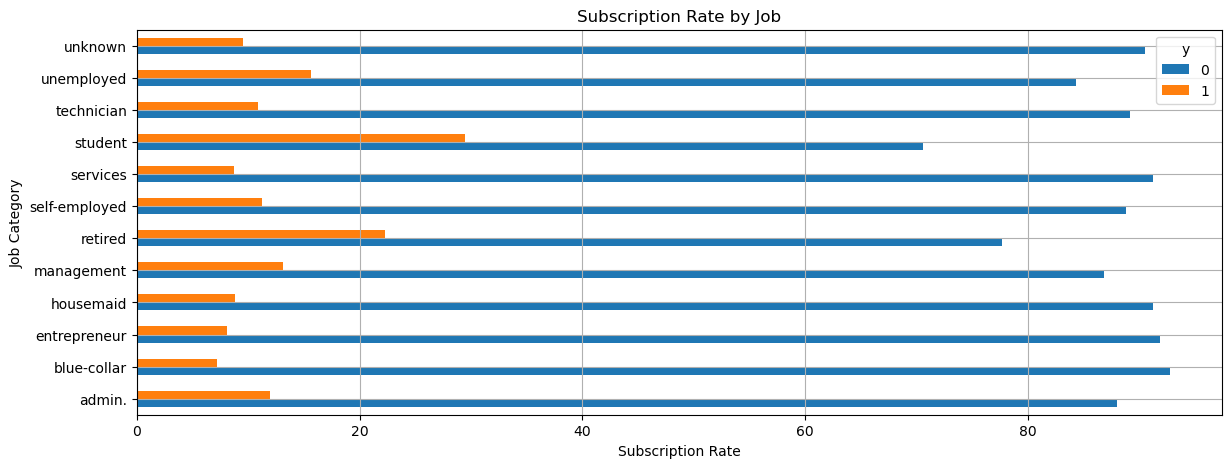

In [201]:
count_job_response_act = pd.crosstab(dataframe['y'], dataframe['job']).apply(lambda x : x/x.sum()*100)
count_job_response_act = count_job_response_act.transpose()
count_job_response_act.plot(kind='barh', figsize=[14, 5])
plt.grid()
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category'); 

#### Inference 
<b>Target students and retired clients</b>

Students and retired clients account for more than 50% of subscription, which is consistent with the previous finding of higher subscription rates among the younger and older.

Visualising the subscription and contact rate by month 

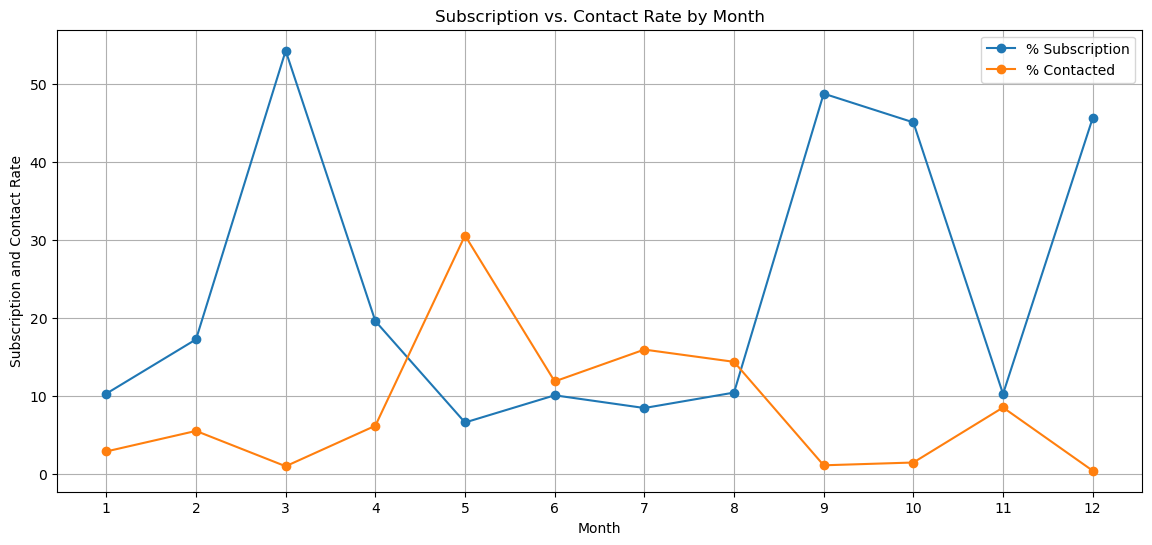

In [228]:
count_month_response_pct = pd.crosstab(dataframe['y'],dataframe['month_int']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()
month = pd.DataFrame(dataframe['month_int'].value_counts())
month.rename(columns={'count':'month_int'}, inplace=True)
month['% Contacted'] = month['month_int']*100/month['month_int'].sum()
month['% Subscription'] = count_month_response_pct[1]

month.drop('month_int',axis = 1,inplace = True)
month['Month'] = [5,7,8,6,11,4,2,1,10,9,3,12]

month = month.sort_values('Month',ascending = True)
# display(month) 

month[['% Subscription', '% Contacted']].plot(kind='line', figsize=[14,6], marker='o');
plt.xticks(np.arange(1,13,1))
plt.grid()
plt.title('Subscription vs. Contact Rate by Month')
plt.ylabel('Subscription and Contact Rate')
plt.xlabel('Month');



### Inference 
<b>Initiate the telemarketing campaign in fall or spring</b>

Besides customer characteristics, external factors may also have an impact on the subscription rate, such as seasons and the time of calling. So the month of contact is also analyzed here.

This line chart displays the bank’s contact rate in each month as well as clients’ response rate in each month. One way to evaluate the effectiveness of the bank's marketing plan is to see whether these two lines have a similar trend over the same time horizon.

The bank contacted most clients between May and August. The highest contact rate is around 30%, which happened in May, while the contact rate is closer to 0 in March, September, October, and December.

However, the subscription rate showed a different trend. The highest subscription rate occurred in March, which is over 50%, and all subscription rates in September, October, and December are over 40%.

Clearly, these two lines move in different directions which strongly indicates the inappropriate timing of the bank’s marketing campaign. To improve the marketing campaign, the bank should consider initiating the telemarketing campaign in fall and spring when the subscription rate tends to be higher.

Nevertheless, the bank should be cautious when analyzing external factors. More data from previous marketing campaign should be collected and analyzed to make sure that this seasonal effect is constant over time and applicable to the future.

# Machine Learning Classification 

The main objective of this project is to identify the most responsive customers before the marketing campaign so that the bank will be able to efficiently reach out to them, saving time and marketing resources. To achieve this objective, classification algorithms will be employed. 

By analyzing customer statistics, a classification model will be built to classify all clients into two groups: "yes" to term deposits and "no" to term deposits

In [311]:
df = pd.read_csv("banking_data.csv")
df.head()

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,married,tertiary,no,2143,yes,no,unknown,5,may,5-May,261,1,-1,0,unknown,no
1,44,technician,single,single,secondary,no,29,yes,no,unknown,5,may,5-May,151,1,-1,0,unknown,no
2,33,entrepreneur,married,married,secondary,no,2,yes,yes,unknown,5,may,5-May,76,1,-1,0,unknown,no
3,47,blue-collar,married,married,unknown,no,1506,yes,no,unknown,5,may,5-May,92,1,-1,0,unknown,no
4,33,unknown,single,single,unknown,no,1,no,no,unknown,5,may,5-May,198,1,-1,0,unknown,no


Cleaning the dataset 

In [312]:
X = df.drop(columns=['y'], axis=1)
y = df['y']

In [313]:
X_cat = X.select_dtypes(include=['object'])
X_num = X.select_dtypes(exclude=['object'])

In [331]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler 
# encoder = OneHotEncoder(sparse_output=False)
scaler = StandardScaler()

dummies_X_cat = pd.get_dummies(X_cat)
dummies_X_cat = dummies_X_cat.astype(int)
scaled_X_num = pd.DataFrame(scaler.fit_transform(X_num), columns=X_num.columns)

In [332]:
final_df = pd.concat([scaled_X_num, dummies_X_cat], axis=1)
final_df

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_status_divorced,marital_status_married,marital_status_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_month_1-Apr,day_month_1-Aug,day_month_1-Feb,day_month_1-Jul,day_month_1-Jun,day_month_1-Mar,day_month_1-Oct,day_month_1-Sep,day_month_10-Aug,day_month_10-Dec,day_month_10-Feb,day_month_10-Jul,day_month_10-Jun,day_month_10-Mar,day_month_10-May,day_month_10-Nov,day_month_10-Oct,day_month_10-Sep,day_month_11-Aug,day_month_11-Dec,day_month_11-Feb,day_month_11-Jan,day_month_11-Jul,day_month_11-Jun,day_month_11-Mar,day_month_11-May,day_month_11-Nov,day_month_11-Oct,day_month_11-Sep,day_month_12-Apr,day_month_12-Aug,day_month_12-Dec,day_month_12-Feb,day_month_12-Jan,day_month_12-Jul,day_month_12-Jun,day_month_12-Mar,day_month_12-May,day_month_12-Nov,day_month_12-Oct,day_month_13-Apr,day_month_13-Aug,day_month_13-Dec,day_month_13-Feb,day_month_13-Jan,day_month_13-Jul,day_month_13-Jun,day_month_13-Mar,day_month_13-May,day_month_13-Nov,day_month_13-Oct,day_month_13-Sep,day_month_14-Apr,day_month_14-Aug,day_month_14-Dec,day_month_14-Jan,day_month_14-Jul,day_month_14-Jun,day_month_14-May,day_month_14-Nov,day_month_14-Oct,day_month_14-Sep,day_month_15-Apr,day_month_15-Dec,day_month_15-Feb,day_month_15-Jan,day_month_15-Jul,day_month_15-Jun,day_month_15-Mar,day_month_15-May,day_month_15-Nov,day_month_15-Oct,day_month_15-Sep,day_month_16-Apr,day_month_16-Aug,day_month_16-Dec,day_month_16-Feb,day_month_16-Jul,day_month_16-Jun,day_month_16-Mar,day_month_16-May,day_month_16-Nov,day_month_16-Oct,day_month_16-Sep,day_month_17-Apr,day_month_17-Aug,day_month_17-Dec,day_month_17-Feb,day_month_17-Jul,day_month_17-Jun,day_month_17-Mar,day_month_17-May,day_month_17-Nov,day_month_17-Oct,day_month_17-Sep,day_month_18-Aug,day_month_18-Dec,day_month_18-Feb,day_month_18-Jan,day_month_18-Jul,day_month_18-Jun,day_month_18-Mar,day_month_18-May,day_month_18-Nov,day_month_18-Oct,day_month_18-Sep,day_month_19-Apr,day_month_19-Aug,day_month_19-Feb,day_month_19-Jul,day_month_19-Jun,day_month_19-Mar,day_month_19-May,day_month_19-Nov,day_month_19-Oct,day_month_2-Apr,day_month_2-Aug,day_month_2-Dec,day_month_2-Feb,day_month_2-Jul,day_month_2-Jun,day_month_2-Mar,day_month_2-Nov,day_month_2-Oct,day_month_2-Sep,day_month_20-Apr,day_month_20-Aug,day_month_20-Jul,day_month_20-Jun,day_month_20-Mar,day_month_20-May,day_month_20-Nov,day_month_20-Oct,day_month_20-Sep,day_month_21-Apr,day_month_21-Aug,day_month_21-Dec,day_month_21-Feb,day_month_21-Jul,day_month_21-Jun,day_month_21-May,day_month_21-Nov,day_month_21-Oct,day_month_21-Sep,day_month_22-Apr,day_month_22-Aug,day_month_22-Dec,day_month_22-Feb,day_month_22-Jan,day_month_22-Jul,day_month_22-Jun,day_month_22-Mar,day_month_22-May,day_month_22-Nov,day_month_22-Oct,day_month_22-Sep,day_month_23-Apr,day_month_23-Aug,day_month_23-Dec,day_month_23-Feb,day_month_23-Jul,day_month_23-Jun,day_month_23-Mar,day_month_23-May,day_month_23-Oct,day_month_23-Sep,day_month_24-Apr,day_month_24-Aug,day_month_24-Dec,day_month_24-Feb,day_month_24-Jul,day_month_24-Jun,day_month_24-Mar,day_month_24-May,day_month_24-Nov,day_month_24-Oct,day_month_24-Sep,day_month_25-Aug,day_month_25-Feb,day_month_25-Jan,day_month_25-Jul,day_month_25-Jun,day_month_25-Mar,day_month_25-May,day_month_25-Nov,day_month_25-Oct,day_month_25-Sep,day_month_26-Apr,day_month_26-Aug,day_month_26-Feb,day_month_26-Jan,day_month_26-Jul,day_month_26-Jun,day_month_26-Mar,day_month_26-May,day_month_26-Oct,day_month_26-Sep,day_month_27-Apr,day_mo

In [334]:
# Split models 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(final_df, y, test_size=0.2, random_state=42)

0.9054621848739496
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7975
         yes       0.66      0.41      0.51      1069

    accuracy                           0.91      9044
   macro avg       0.79      0.69      0.73      9044
weighted avg       0.89      0.91      0.90      9044



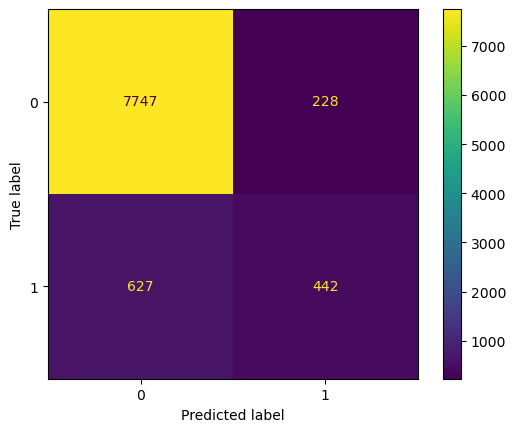

In [336]:
# Testing models - Logistic Regression 
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=100000)
lr_model.fit(X_train, y_train)
pred = lr_model.predict(X_test)

print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, pred)).plot(); 

/Users/ritwik/anaconda3/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8984962406015038
              precision    recall  f1-score   support

          no       0.92      0.97      0.94      7975
         yes       0.62      0.37      0.47      1069

    accuracy                           0.90      9044
   macro avg       0.77      0.67      0.70      9044
weighted avg       0.88      0.90      0.89      9044



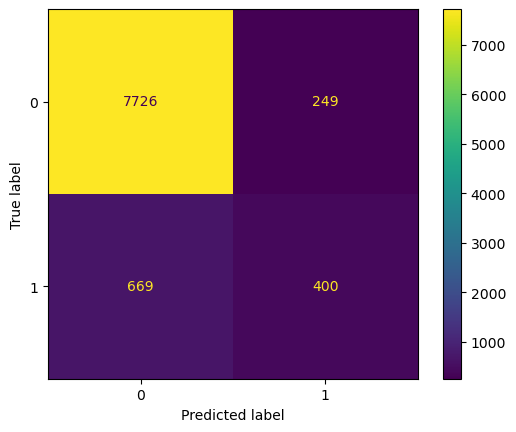

In [344]:
# Testing models - KNN
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
pred = knn_model.predict(X_test.values)

print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, pred)).plot(); 

/Users/ritwik/anaconda3/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8805838124723574
              precision    recall  f1-score   support

          no       0.93      0.93      0.93      7975
         yes       0.49      0.49      0.49      1069

    accuracy                           0.88      9044
   macro avg       0.71      0.71      0.71      9044
weighted avg       0.88      0.88      0.88      9044



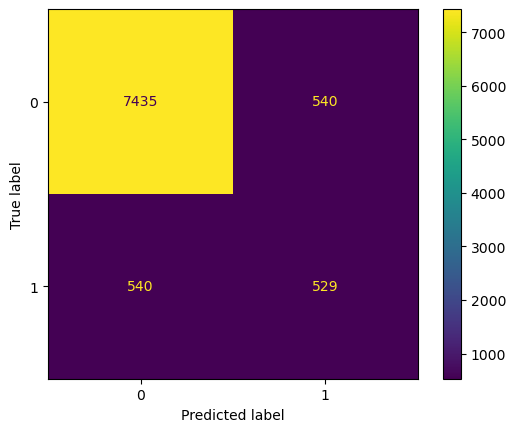

In [345]:
# Testing models - Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier()
dtree_model.fit(X_train, y_train)
pred = dtree_model.predict(X_test.values)

print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, pred)).plot(); 

/Users/ritwik/anaconda3/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.903140203449801
              precision    recall  f1-score   support

          no       0.92      0.98      0.95      7975
         yes       0.68      0.34      0.45      1069

    accuracy                           0.90      9044
   macro avg       0.80      0.66      0.70      9044
weighted avg       0.89      0.90      0.89      9044



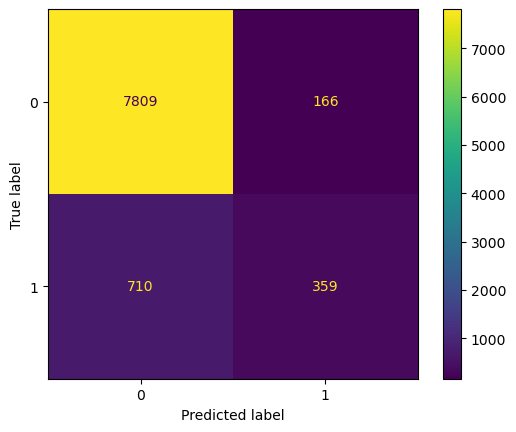

In [346]:
# Testing models - 
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
pred = rf_model.predict(X_test.values)

print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, pred)).plot(); 

## Conclusion 

According to previous analysis, a target customer profile can be established. The most responsive customers possess these features:

Feature 1: age < 30 or age > 60<br>
Feature 2: students or retired people<br>
Feature 3: a balance of more than 5000 euros<br>
By applying logistic and ridge regression algorithms, classification and estimation model were successfully built. With these two models, the bank will be able to predict a customer's response to its telemarketing campaign before calling this customer. In this way, the bank can allocate more marketing efforts to the clients who are classified as highly likely to accept term deposits, and call less to those who are unlikely to make term deposits.

In addition, predicting duration before calling and adjusting marketing plan benefit both the bank and its clients. On the one hand, it will increase the efficiency of the bank’s telemarketing campaign, saving time and efforts. On the other hand, it prevents some clients from receiving undesirable advertisements, raising customer satisfaction. With the aid of logistic and ridge regression models, the bank can enter a virtuous cycle of effective marketing, more investments and happier customers.

Recommendations¶
1. More appropriate timing

When implementing a marketing strategy, external factors, such as the time of calling, should also be carefully considered. The previous analysis points out that March, September, October and December had the highest success rates. Nevertheless, more data should be collected and analyzed to make sure that this seasonal effect is constant over time. If the trend has the potential to continue in the future, the bank should consider initiating its telemarketing campaign in fall and spring.

2. Smarter marketing design

By targeting the right customers, the bank will have more and more positive responses, and the classification algorithms would ultimately eliminate the imbalance in the original dataset. Hence, more accurate information will be presented to the bank for improving the subscriptions. Meanwhile, to increase the likelihood of subscription, the bank should re-evaluate the content and design of its current campaign, making it more appealing to its target customers.

3. Better services provision

With a more granular understanding of its customer base, the bank has the ability to provide better banking services. For example, marital status and occupation reveal a customer's life stage while loan status indicates his/her overall risk profile. With this information, the bank can estimate when a customer might need to make an investment. In this way, the bank can better satisfy its customer demand by providing banking services for the right customer at the right time.

In [380]:
y = y.apply(lambda x : 1 if x == 'yes' else 0)

In [382]:
corr_df = pd.concat((final_df,pd.DataFrame(y)), axis=1)

In [387]:
correlation_series = corr_df.corr()['y'][:-1].sort_values(ascending=False)

Top 10 positive correlations 

In [388]:
correlation_series[:10]

duration            0.394387
poutcome_success    0.307083
housing_no          0.139445
contact_cellular    0.136036
month_mar           0.129371
month_oct           0.128439
month_sep           0.123099
pdays               0.103699
previous            0.093576
day_month_30-Apr    0.092786
Name: y, dtype: float64

Top 10 negative correlations

In [389]:
correlation_series[-10:]

education_primary        -0.040313
marital_status_married   -0.060216
marital_married          -0.060216
loan_yes                 -0.068289
job_blue-collar          -0.072211
campaign                 -0.073294
month_may                -0.102656
housing_yes              -0.139445
contact_unknown          -0.151062
poutcome_unknown         -0.167284
Name: y, dtype: float64

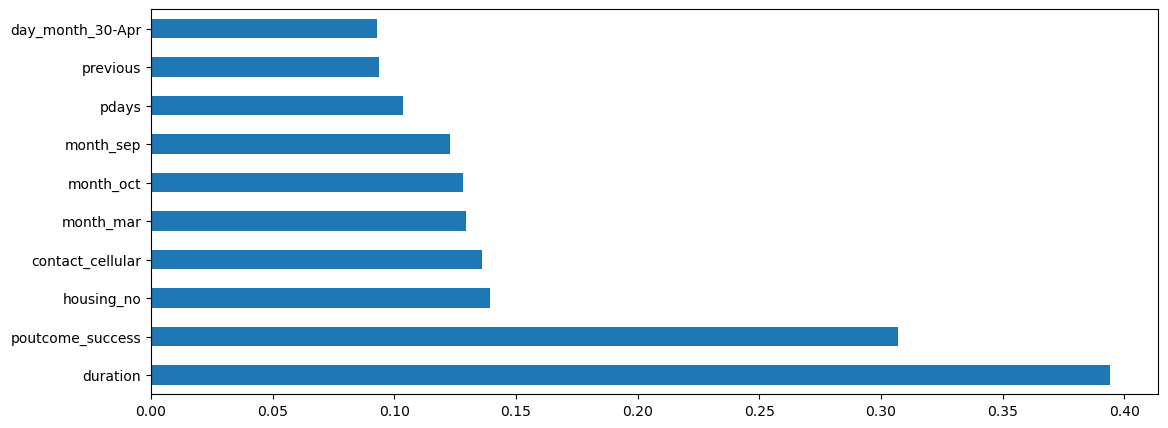

In [398]:
correlation_series[:10].plot(figsize=[13, 5], kind='barh');

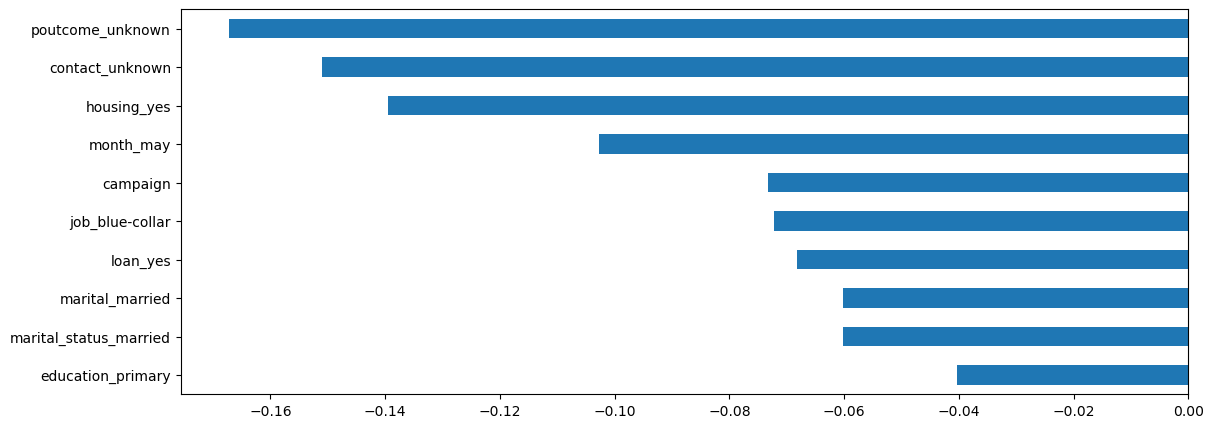

In [399]:
correlation_series[-10:].plot(figsize=[13, 5], kind='barh');